In [377]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [378]:
df= pd.read_csv("europe-motorbikes-zenrows.csv")
df

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.00,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.00,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.00,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.00,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...
...,...,...,...,...,...,...,...,...,...,...
34912,17300,10592,125.00,BMW R 1200 RT,04/2018,Gasoline,Manual,Used,R 1200RT LC,/offers/bmw-r-1200-rt-r-1200rt-lc-gasoline-bla...
34913,8500,29000,54.00,Harley-Davidson Iron 883,05/2004,Gasoline,NaN,Used,NaN,/offers/harley-davidson-iron-883-gasoline-blac...
34914,11990,39140,160.00,BMW S 1000 XR,06/2015,NaN,Manual,Used,ABS,/offers/bmw-s-1000-xr-abs-white-6dac336b-e49b-...
34915,8350,11500,56.00,Triumph Bonneville T100,05/2018,Gasoline,Manual,Used,Black mit Garantie,/offers/triumph-bonneville-t100-black-mit-gara...


In [379]:
df.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.00,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.00,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.00,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.00,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [381]:
df.shape

(34917, 10)

In [382]:
pd.set_option("display.float_format","{:.2f}".format)

In [383]:
df.describe()

,price,mileage,power
count,34917.00,34917.00,28598.00
mean,45685.32,21831.75,206.16
std,4850120.19,205942.09,9371.43
min,1.00,0.00,1.00
25%,6999.00,2932.00,50.00
50%,9920.00,11000.00,90.00
75%,12590.00,25000.00,125.00
max,888888888.00,9999999.00,913595.00


In [384]:
df.isnull().sum()

price             0
mileage           0
power          6319
make_model        0
date              0
fuel           3190
gear          22070
offer_type        0
version       17504
link              0
dtype: int64

In [385]:
df.duplicated().sum()

5832

In [386]:
df.drop_duplicates(inplace= True)

In [387]:
df.duplicated().sum()

0

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gasoline'),
  Text(1, 0, 'Two Stroke Gasoline'),
  Text(2, 0, 'Electric'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Diesel'),
  Text(5, 0, 'Electric/Gasoline'),
  Text(6, 0, 'LPG')])

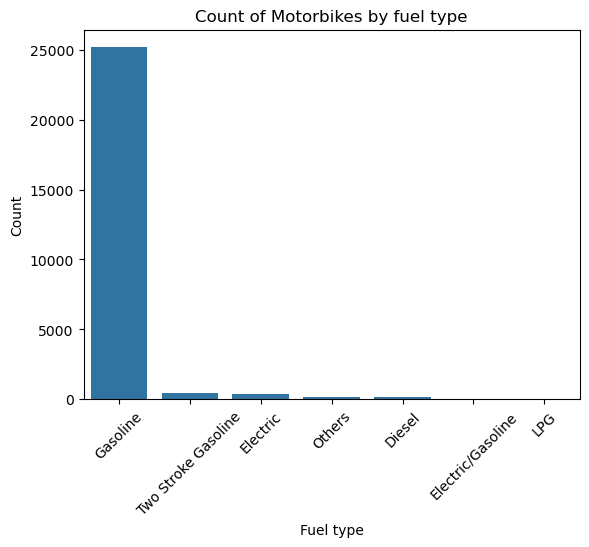

In [388]:
sns.countplot(x="fuel",data=df)
plt.xlabel("Fuel type")
plt.ylabel("Count")
plt.title("Count of Motorbikes by fuel type")
plt.xticks(rotation= 45)

In [389]:
gear_power= df.groupby("gear")["power"].mean()
gear_power

gear
Automatic         80.23
Manual           103.79
Semi-automatic   126.93
Name: power, dtype: float64

In [390]:
df.sort_values(by="price",ascending= False)

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
23654,888888888,1196,10.00,SYM SYMNH X,08/2019,Gasoline,Manual,Used,!!! VENDUE !!! indisponible,/offers/sym-symnh-x-vendue-indisponible-gasoli...
20925,123456789,24000,101.00,Buell XB 12,06/2009,Gasoline,Manual,Used,NaN,/offers/buell-xb-12-gasoline-red-6bd3eec5-449d...
6857,123456789,24,175.00,EBR RS,11/2011,Gasoline,Manual,Used,EBR 1190 RS Nieuw !,/offers/ebr-rs-ebr-1190-rs-nieuw-gasoline-blac...
28952,9999999,9999999,12.00,Harley-Davidson Custom Bike,02/2018,Gasoline,NaN,Used,NaN,/offers/harley-davidson-custom-bike-gasoline-g...
27266,9999999,9999999,1358.00,Harley-Davidson Bad Boy,01/2020,Diesel,NaN,Used,test big images,/offers/harley-davidson-bad-boy-test-big-image...
...,...,...,...,...,...,...,...,...,...,...
34899,50,390,1.00,Kymco Like 50,06/2011,Gasoline,NaN,Used,NaN,/offers/kymco-like-50-gasoline-white-70b79c85-...
11155,50,19000,88.00,Harley-Davidson Dyna Wide Glide,03/1999,Gasoline,NaN,Used,NaN,/offers/harley-davidson-dyna-wide-glide-gasoli...
19299,50,6700,4.00,Suzuki Katana 50,03/1997,Gasoline,NaN,Used,NaN,/offers/suzuki-katana-50-gasoline-black-0e0927...
15003,2,23000,14.00,Dnepr MT 10,09/1984,Gasoline,Manual,Antique / Classic,36 Sidecar,/offers/dnepr-mt-10-36-sidecar-gasoline-black-...


In [391]:
## IQR

In [392]:
offer_count=df["offer_type"].value_counts()
offer_count

offer_type
Used                 26263
New                   1730
Demonstration          680
Pre-registered         239
Antique / Classic      173
Name: count, dtype: int64

In [393]:
make_model_counts= df["make_model"].value_counts()
make_model_counts.head(5)

make_model
BMW R 1200 GS              678
BMW R nineT                377
Others                     336
Harley-Davidson Softail    328
Honda                      323
Name: count, dtype: int64

In [394]:
fuel_avg_price=df.groupby("fuel")["price"].mean()
fuel_avg_price.sort_values(ascending=False)

fuel
LPG                   5003124.50
Diesel                 163621.05
Gasoline                57857.77
Others                   9453.84
Electric                 6202.65
Electric/Gasoline        6037.38
Two Stroke Gasoline      3713.34
Name: price, dtype: float64

In [395]:
gear_median_mileage= df.groupby("gear")["mileage"].median()
gear_median_mileage

gear
Automatic         5359.00
Manual           12345.00
Semi-automatic   11000.00
Name: mileage, dtype: float64

In [396]:
offer_max_power= df.groupby("offer_type")["power"].max()
offer_max_power.sort_values(ascending=False)

offer_type
Used                913595.00
New                    888.00
Antique / Classic      500.00
Demonstration          218.00
Pre-registered         218.00
Name: power, dtype: float64

In [397]:
model_avg_price=df.groupby("make_model")["price"].mean()
model_avg_price.sort_values(ascending=False).head(5)

make_model
SYM SYMNH X                  148149748.00
EBR RS                       123456789.00
Honda ATC 125                  9999999.00
Kawasaki 400 S3                9999999.00
Harley-Davidson Café Racer     5008749.50
Name: price, dtype: float64

In [398]:
fuel_gear_counts=df.groupby(["fuel","gear"]).size().unstack(fill_value=0)
fuel_gear_counts

gear,Automatic,Manual,Semi-automatic
fuel,,,
Diesel,5,8,0
Electric,190,9,1
Electric/Gasoline,2,1,0
Gasoline,1675,8179,231
Others,10,61,0
Two Stroke Gasoline,51,57,3


In [399]:
fuel_avg_price= df.groupby("fuel")["price"].mean()
fuel_avg_price.sort_values(ascending=False, inplace= True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'LPG'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Gasoline'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Electric'),
  Text(5, 0, 'Electric/Gasoline'),
  Text(6, 0, 'Two Stroke Gasoline')])

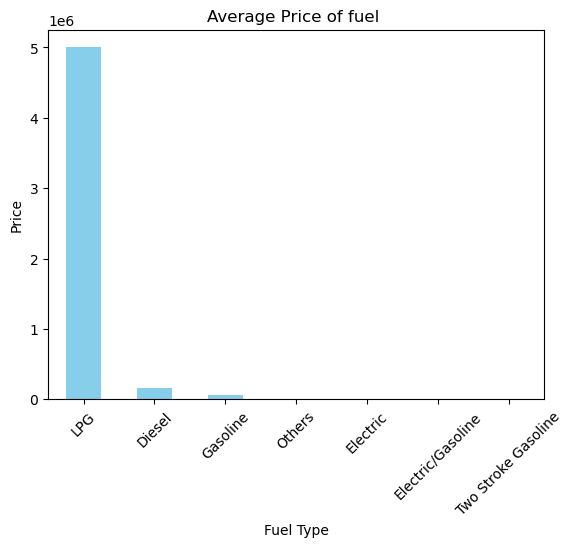

In [400]:
fuel_avg_price.plot(kind="bar", color= "skyblue")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Average Price of fuel ")
plt.xticks(rotation= 45)

In [401]:
offer_max_power= df.groupby("offer_type")["power"].max()
offer_max_power.sort_values(ascending= False, inplace= True)

In [402]:
offer_max_power=offer_max_power.tail(4)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'New'),
  Text(1, 0, 'Antique / Classic'),
  Text(2, 0, 'Demonstration'),
  Text(3, 0, 'Pre-registered')])

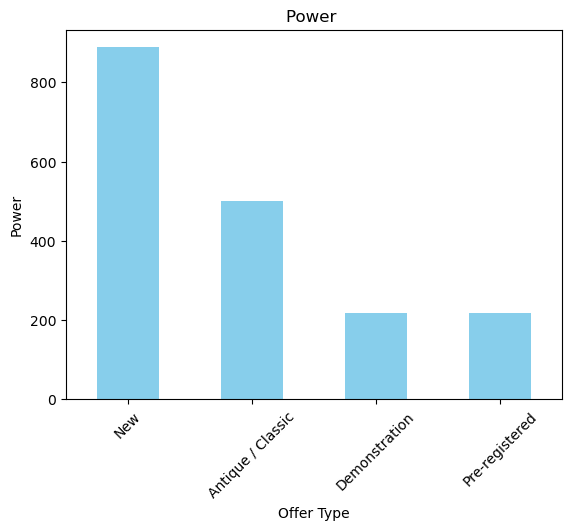

In [403]:
offer_max_power.plot(kind="bar", color= "skyblue")
plt.xlabel("Offer Type")
plt.ylabel("Power")
plt.title("Power ")
plt.xticks(rotation= 45)

In [404]:
fuel_distribution= df["fuel"].value_counts()

In [405]:
fuel_distribution= fuel_distribution.tail(6)

In [406]:
fuel_distribution

fuel
Two Stroke Gasoline    469
Electric               374
Others                 148
Diesel                 132
Electric/Gasoline        8
LPG                      2
Name: count, dtype: int64

Text(0.5, 1.0, 'fuel distribution')

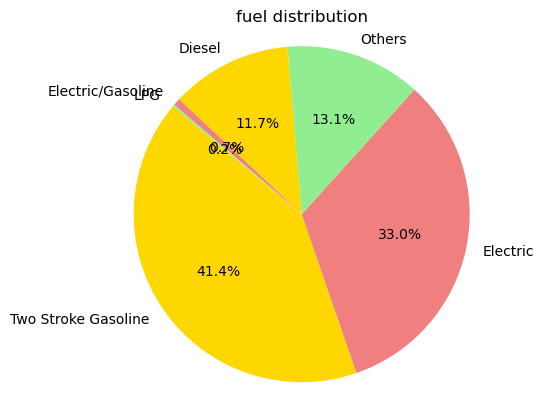

In [407]:
plt.pie(fuel_distribution, labels= fuel_distribution.index, autopct="%1.1f%%", startangle= 140, colors=["gold","lightcoral","lightgreen"])
plt.axis("equal")
plt.title("fuel distribution")

In [408]:
df.columns

Index(['price', 'mileage', 'power', 'make_model', 'date', 'fuel', 'gear',
       'offer_type', 'version', 'link'],
      dtype='object')

In [409]:
df= pd.read_csv("europe-motorbikes-zenrows.csv")
df.dropna(inplace=True)

In [410]:
y= df[['price']]
y

,price
0,23990
12,18000
14,10000
17,12500
22,10950
...,...
34893,10990
34895,1350
34897,8990
34912,17300


In [465]:
X= df[['mileage', 'power','fuel','offer_type','gear']]
X

,mileage,power,fuel,offer_type,gear
0,150,218.00,3,1,1
12,700,41.00,3,4,1
14,80000,125.00,3,4,1
17,18000,82.00,3,4,1
22,10551,185.00,3,4,1
...,...,...,...,...,...
34893,1500,105.00,3,1,1
34895,4200,10.00,3,4,0
34897,22800,97.00,3,4,1
34912,10592,125.00,3,4,1


In [433]:
from sklearn import preprocessing
labelencoder= preprocessing.LabelEncoder()

In [469]:
df["fuel"]=labelencoder.fit_transform(df["fuel"])
df["offer_type"]=labelencoder.fit_transform(df["offer_type"])
df["gear"]=labelencoder.fit_transform(df["gear"])

In [467]:
X

,mileage,power,fuel,offer_type,gear
0,150,218.00,3,1,1
12,700,41.00,3,4,1
14,80000,125.00,3,4,1
17,18000,82.00,3,4,1
22,10551,185.00,3,4,1
...,...,...,...,...,...
34893,1500,105.00,3,1,1
34895,4200,10.00,3,4,0
34897,22800,97.00,3,4,1
34912,10592,125.00,3,4,1


In [471]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2)

In [473]:
from sklearn.preprocessing import StandardScaler

In [475]:
scaler= StandardScaler()

In [477]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.fit_transform(X_test)

In [479]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print("Mean Absolute error on the model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Root square error on the model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [481]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [483]:
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [485]:
predslr = lr.predict(scaled_X_test)
predslr

array([[217582.38186251],
       [234055.98362614],
       [197002.79712314],
       ...,
       [ 84989.54454879],
       [ 87514.65925097],
       [240801.87759287]])

In [487]:
modelresults(predslr)

Mean Absolute error on the model is 186453.18023496703
Root square error on the model is 202491.98150369214


In [489]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [491]:
svrmodel= SVR()

In [493]:
param_gridsvr={"C": [.001,.01,.1,.5],
              "kernel" : ["linear","rbf","poky"],
              "gamma": ["scale","auto"],
               "degree":[2,3,4,5]}

In [495]:
gridsvr= GridSearchCV(svrmodel, param_gridsvr)

In [497]:
gridsvr.fit(scaled_X_train, y_train)

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poky']})

In [498]:
print("Best parameters for model is {}".format(gridsvr.best_params_))

Best parameters for model is {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [501]:
predictiongridsvr= gridsvr.predict(scaled_X_test)

In [503]:
modelresults(predictiongridsvr)

Mean Absolute error on the model is 5741.423194160426
Root square error on the model is 27537.168182710215


In [505]:
from sklearn.ensemble import RandomForestRegressor
rtfmodel=RandomForestRegressor()

In [507]:
param_gridrfr={"bootstrap":[True],
              "max_depth": [5,10,15],
              "max_features":["auto","log2"],
              "n_estimators":[3,4,5,6,7]}


In [509]:
gridrfr=GridSearchCV(rtfmodel,param_gridrfr)

In [511]:
gridrfr.fit(scaled_X_train, y_train)

C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [3, 4, 5, 6, 7]})

In [512]:
print("Best parameters for model is {}".format(gridrfr.best_params_))

Best parameters for model is {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 3}


In [515]:
predictiongridrfr= gridrfr.predict(scaled_X_test)

In [517]:
modelresults(predictiongridrfr)

Mean Absolute error on the model is 465849.68242723704
Root square error on the model is 4350056.852745835
